In [1]:
import warnings
warnings.filterwarnings("ignore")
import jieba
import pandas as pd
import PIL; 
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
p_comment_ori = pd.read_csv('./data/hotel_comments-utf8.csv',sep = ",", encoding = "UTF-8")

In [3]:
p_comments = p_comment_ori[['飯店名稱', '正評','縣市地區']]

In [4]:
p_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25614 entries, 0 to 25613
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   飯店名稱    25614 non-null  object
 1   正評      22613 non-null  object
 2   縣市地區    25614 non-null  object
dtypes: object(3)
memory usage: 600.5+ KB


In [5]:
p_comments.isnull().sum()

飯店名稱       0
正評      3001
縣市地區       0
dtype: int64

In [28]:
import jieba
import jieba.analyse
import re
p_comments['正評']= p_comments['正評'].str.replace(r'([^\u4e00-\u9fa5]+)','', regex=True)

jieba.load_userdict("./data/myhotel.txt") 

def stopwordlist():
    stopwords = [line.strip() for line in open('./data/stop_words_hotel.txt', encoding='UTF-8').readlines()]
    return stopwords

stopwords = stopwordlist()

# 斷詞並同時去除stop words
p_comments['正評_cut'] = p_comments['正評'].astype(str).apply(lambda x : [i for i in jieba.cut(x) if i not in stopwords])

# 擷取關鍵字TF-IDF (top 15)
p_comments['正評_key_word'] = p_comments['正評_cut'].astype(str).apply(lambda x : [i for i in jieba.analyse.extract_tags(x, topK=10)])

In [30]:
p_comments

,飯店名稱,正評,縣市地區,正評_cut,正評_key_word
0,WO Hotel,高,高雄飯店排名：,[高],[]
1,WO Hotel,整體上都很好,高雄飯店排名：,[整體],[整體]
2,WO Hotel,房間景色不錯有浴缸可以泡澡空調調整方便有辦公桌早餐蠻豐富多樣,高雄飯店排名：,"[房間, 景色, 浴缸, 泡澡, 空調, 調整, 辦公桌, 早餐, 多樣]","[浴缸, 房間, 空調, 調整, 辦公桌, 多樣, 泡澡, 早餐, 景色]"
3,WO Hotel,早餐很好吃有大浴缸,高雄飯店排名：,"[早餐, 好吃, 有大, 浴缸]","[浴缸, 有大, 早餐, 好吃]"
4,WO Hotel,位置很好吧稍微走路可以到捷運附近也是吃飯觀光都可以滿足早餐還不錯,高雄飯店排名：,"[位置, 稍微, 走路, 捷運, 吃, 飯, 觀光, 早餐]","[捷運, 觀光, 早餐, 稍微, 走路, 位置]"
...,...,...,...,...,...
25609,雙星大飯店,非常近皆丁寧持良,台中飯店排名：,"[皆, 丁寧持良]",[丁寧持良]
25610,雙星大飯店,,台中飯店排名：,[],[]
25611,雙星大飯店,拉致件最高希望人部屋,台中飯店排名：,"[拉致件, 希望, 人部屋]","[拉致件, 人部屋, 希望]"
25612,雙星大飯店,,台中飯店排名：,[],[]


In [31]:
all_p = []
for i in range(len(p_comments)):
    tmp = p_comments['正評_key_word'][i]
    all_p.extend(tmp)

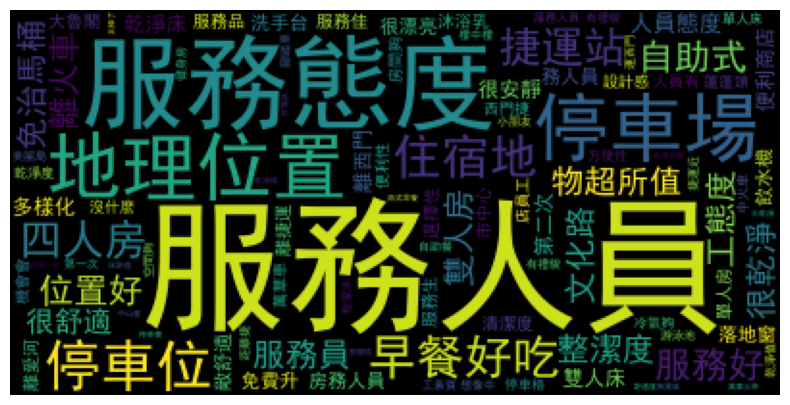

In [32]:
#所有人最在意
all_p_wordcloud = [word for word in all_p if len(word) >= 3] # 只抓三個字以上的正評關鍵字

wc = WordCloud(background_color='black',       #設置背景顏色
               font_path='./data/SimHei.ttf',  #設置字體格式，顯示中文
               max_words=100)                   #設置最大實現的字數
wc.generate(str(all_p_wordcloud))
all_p_wordcloud_cleaned = [word.replace("'", "") for word in all_p_wordcloud]
wc.generate(' '.join(all_p_wordcloud_cleaned))

plt.figure(figsize=(10,5))
plt.imshow(wc)
plt.axis("off")
plt.show()

# wc.to_file('all_p_wordcloud.jpg')

In [ ]:
all_p_wordcloud_cleaned

In [33]:
df = pd.read_csv('./data/hotel_comments-utf8.csv', sep = ",", encoding = "UTF-8")
city_comment_counts = df['縣市地區'].str.slice(stop=2).value_counts()
print(city_comment_counts)

縣市地區
高雄    7946
台北    7645
台中    6847
嘉義    3176
Name: count, dtype: int64


In [34]:
df = pd.read_csv('./data/hotel_comments-utf8.csv', sep = ",", encoding = "UTF-8")
df['縣市地區']=df['縣市地區'].str.slice(stop=2)

keep_columns = ['縣市地區', '正評','飯店名稱']
df = df.drop(columns=[col for col in df.columns if col not in keep_columns])
stopwords = stopwordlist()

df_ks = df[df['縣市地區'] == '高雄']
df_tc = df[df['縣市地區'] == '台中']
df_tp = df[df['縣市地區'] == '台北']
df_cy = df[df['縣市地區'] == '嘉義']


In [35]:
def stopwordlist():
    stopwords = [line.strip() for line in open('./data/stop_words_hotel.txt', encoding='UTF-8').readlines()]
    return stopwords

stopwords = stopwordlist()

def generate_wordcloud(data_frame, file_name):
    data_frame['正評'] = data_frame['正評'].str.replace(r'([^\u4e00-\u9fa5]+)', '', regex=True)
    data_frame['正評_cut'] = data_frame['正評'].astype(str).apply(lambda x: [i for i in jieba.cut(x) if i not in stopwords])
    data_frame['key_word'] = data_frame['正評_cut'].astype(str).apply(lambda x: [i for i in jieba.analyse.extract_tags(x, topK=15)])

    p_list = []
    data_frame = data_frame.reset_index(drop=True)
    for t in range(len(data_frame)):
        tmp = data_frame['key_word'][t]
        p_list.extend(tmp)

    wordcloud = [word for word in p_list if len(word) >= 3]

    wc = WordCloud(background_color='black',
                   font_path='./data/SimHei.ttf',
                   max_words=100)
    wc.generate(str(wordcloud))
    wordcloud_cleaned = [word.replace("'", "") for word in wordcloud]
    wc.generate(' '.join(wordcloud_cleaned))

    plt.figure(figsize=(10, 5))
    plt.imshow(wc)
    plt.axis("off")
    plt.show()

#     wc.to_file(file_name)

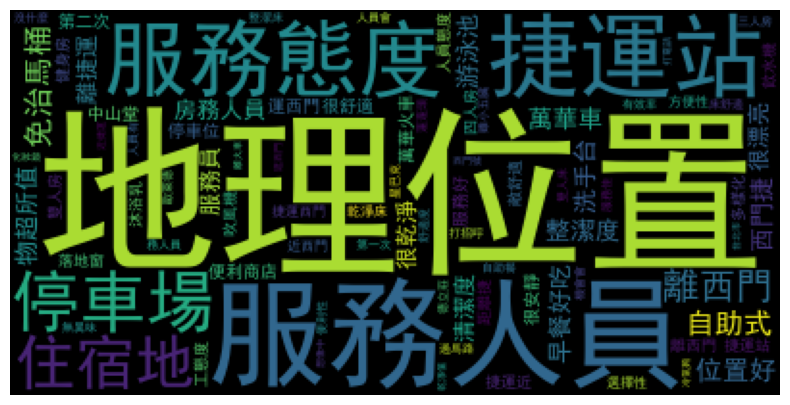

In [38]:
# 台北
generate_wordcloud(df_tp, 'tp_wordcloud.jpg')

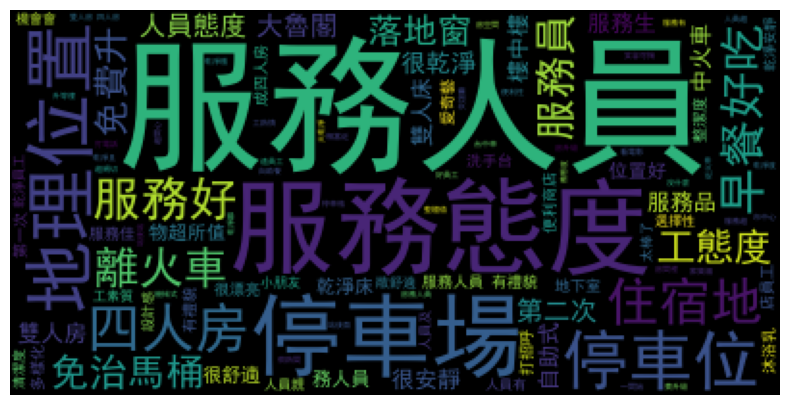

In [39]:
# 台中
generate_wordcloud(df_tc, 'tc_wordcloud.jpg')

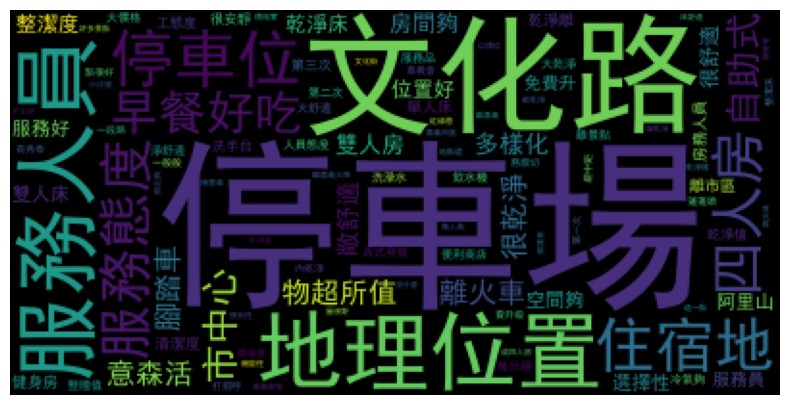

In [40]:
# 嘉義
generate_wordcloud(df_cy, 'cy_wordcloud.jpg')


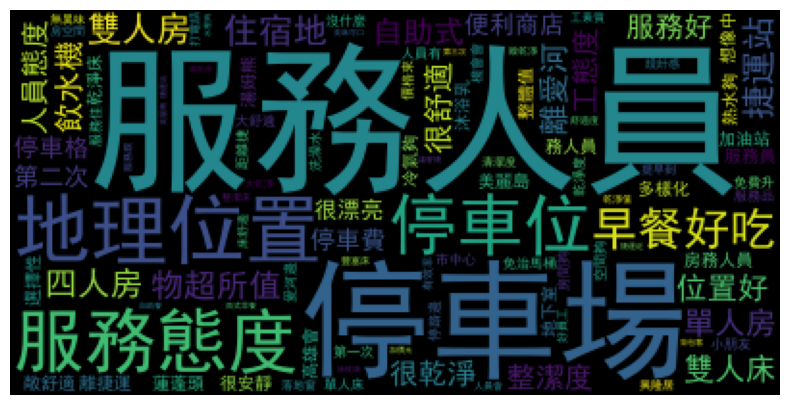

In [41]:
# 高雄
generate_wordcloud(df_ks, 'ks_wordcloud.jpg')

In [42]:
corpus = pd.DataFrame(all_p_wordcloud_cleaned, columns=['word'])
corpus['cnt'] = 1

corpus_cnt = corpus.groupby(['word'])\
                   .agg({'cnt': 'count'})\
                   .sort_values('cnt', ascending=False)\
                   .reset_index(level=0)
corpus_cnt.head(10)

,word,cnt
0,服務人員,1722
1,服務態度,716
2,停車場,693
3,地理位置,674
4,停車位,338
5,住宿地,286
6,早餐好吃,251
7,捷運站,208
8,四人房,198
9,自助式,137
